In [1]:
import pandas as pd 
import ucimlrepo

In [24]:
df = pd.read_csv('german_credit_data.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.shape

(1000, 9)

In [25]:
set(list(df['Purpose']))

{'business',
 'car',
 'domestic appliances',
 'education',
 'furniture/equipment',
 'radio/TV',
 'repairs',
 'vacation/others'}

In [27]:
data  = ucimlrepo.fetch_ucirepo(id=144)

In [28]:
data.data.targets.shape

(1000, 1)

In [29]:
final_dataset = pd.concat([df,  data.data.targets], axis = 1)

In [30]:
final_dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,class
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,2


In [31]:
final_dataset.to_csv("german_credit_data_final.csv", index=False)

In [35]:
df = pd.read_csv('german_credit_data_final.csv')
df.shape

(1000, 10)

In [37]:
df_new = df.dropna(how='any')
df_new.to_csv("german_credit_data_final.csv")

In [38]:
df = pd.read_csv('german_credit_data_final.csv')
df.shape

(522, 11)

In [39]:
df.head()
# Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,class
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,2
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
2,4,53,male,2,free,little,little,4870,24,car,2
3,7,35,male,3,rent,little,moderate,6948,36,car,1
4,9,28,male,3,own,little,moderate,5234,30,car,2


## lets  create the training data and label encoding  for categorical columns 

In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


def encode_categorical_columns(df):
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
        print(f"Mapping for column '{column}':")
        for class_, val in zip(le.classes_, le.transform(le.classes_)):
            print(f"  {class_} -> {val}")
    return df, label_encoders

df_encoded, label_encoders  = encode_categorical_columns(df)

Mapping for column 'Sex':
  female -> 0
  male -> 1
Mapping for column 'Housing':
  free -> 0
  own -> 1
  rent -> 2
Mapping for column 'Saving accounts':
  little -> 0
  moderate -> 1
  quite rich -> 2
  rich -> 3
Mapping for column 'Checking account':
  little -> 0
  moderate -> 1
  rich -> 2
Mapping for column 'Purpose':
  business -> 0
  car -> 1
  domestic appliances -> 2
  education -> 3
  furniture/equipment -> 4
  radio/TV -> 5
  repairs -> 6
  vacation/others -> 7


In [48]:
import pickle
def save_label_encoders(encoders, filepath):
    with open(filepath, 'wb') as file:
        pickle.dump(encoders, file)
    print(f"Label encoders saved to {filepath}")

def load_label_encoders(filepath):
    with open(filepath, 'rb') as file:
        encoders = pickle.load(file)
    print(f"Label encoders loaded from {filepath}")
    return encoders


## Save all the label encoders for future analysis

In [49]:
save_label_encoders(label_encoders, 'label_encoders.pkl')

# Load the label encoders from the file
loaded_encoders = load_label_encoders('label_encoders.pkl')

for key, value in label_encoders.items():
    print(f"Mapping for column '{key}':")
    for class_, val in zip(value.classes_, value.transform(value.classes_)):
        print(f"  {class_} -> {val}")
    

Label encoders saved to label_encoders.pkl
Label encoders loaded from label_encoders.pkl
Mapping for column 'Sex':
  female -> 0
  male -> 1
Mapping for column 'Housing':
  free -> 0
  own -> 1
  rent -> 2
Mapping for column 'Saving accounts':
  little -> 0
  moderate -> 1
  quite rich -> 2
  rich -> 3
Mapping for column 'Checking account':
  little -> 0
  moderate -> 1
  rich -> 2
Mapping for column 'Purpose':
  business -> 0
  car -> 1
  domestic appliances -> 2
  education -> 3
  furniture/equipment -> 4
  radio/TV -> 5
  repairs -> 6
  vacation/others -> 7


## save the encoded dataframe

In [51]:
df_encoded.to_csv("encoded_final_data.csv")

## lets create and save train and test split for training

In [52]:
from sklearn.model_selection import train_test_split

def split_and_save_data(df, test_size=0.2, train_filepath='train.csv', test_filepath='test.csv', random_state=None):
    # Split the DataFrame into training and testing sets
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=random_state)
    
    # Save the training set to a CSV file
    train_df.to_csv(train_filepath, index=False)
    print(f"Training data saved to {train_filepath}")
    
    # Save the testing set to a CSV file
    test_df.to_csv(test_filepath, index=False)
    print(f"Testing data saved to {test_filepath}")
    
    return train_df, test_df

train_df, test_df = split_and_save_data(df_encoded)


Training data saved to train.csv
Testing data saved to test.csv


In [56]:
print("shape of training data", train_df.shape)
print("shape of testing data", test_df.shape)

shape of training data (417, 11)
shape of testing data (105, 11)


## lets look at the bounds for each column

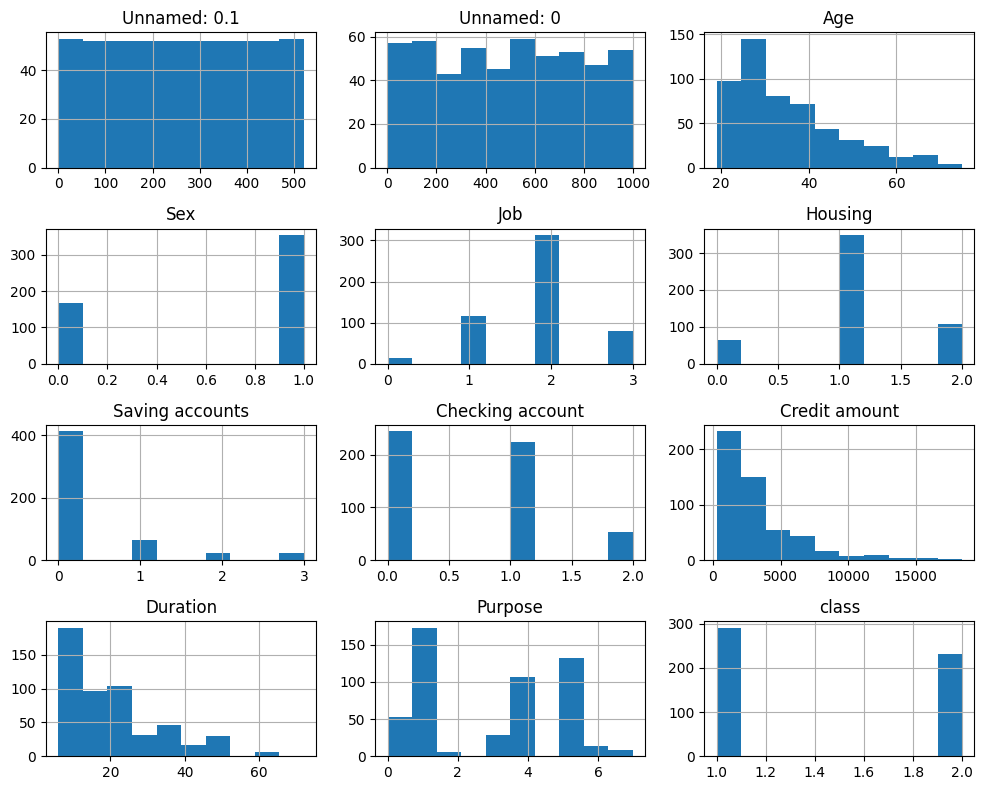

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df_encoded = pd.read_csv("encoded_final_data.csv")


df_encoded.hist(bins=10, figsize=(10, 8))


plt.tight_layout()
plt.show()

In [3]:
df_encoded.describe()

,Unnamed: 0.1,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,class
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,260.500000,493.522989,34.888889,0.678161,1.875479,1.082375,0.342912,0.632184,3278.745211,21.339080,2.881226,1.442529
std,150.832689,291.131014,11.787918,0.467630,0.682811,0.570311,0.760870,0.660627,2929.155177,12.474079,1.994540,0.497163
min,0.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,276.000000,6.000000,0.000000,1.000000
25%,130.250000,233.500000,26.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1297.500000,12.000000,1.000000,1.000000
50%,260.500000,502.500000,31.500000,1.000000,2.000000,1.000000,0.000000,1.000000,2326.500000,18.000000,4.000000,1.000000
75%,390.750000,736.750000,41.000000,1.000000,2.000000,1.000000,0.000000,1.000000,3971.250000,26.750000,5.000000,2.000000
max,521.000000,999.000000,75.000000,1.000000,3.000000,2.000000,3.000000,2.000000,18424.000000,72.000000,7.000000,2.000000
